# Solving the N Queens Problem

## Problem Description.

Originally known as the eight-queen puzzle, the classic N-Queens problem originated
from the game of chess, and the 8x8 chessboard was its early playground. The task was to
place eight chess queens on the board without any two of them threatening each other. In
other words, no two queens can share the same row, same column, or same diagonal. The
N-Queens problem is similar, using an N×N chessboard and N chess queens


```{figure} ./../img/2024-04-25-18-39-16.png
---
align: center
---

One of the 92 possible solutions to the 8-queens problem

```

### 1. Explain why to select this count of population. 

Why is this basically selecting for 
```py
offspring = toolbox.select(population, len(population) - hof_size)?
```


# So it replaces with the selected into that count?



- [ ]  Does The individual have a fitness value?

The first individual created will be a simple list containing floats. In order to produce this kind of individual, we need to create an Individual class, using the creator, that will inherit from the standard list type and have a fitness attribute.

```python
 # Evaluate the individuals with an invalid fitness
invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
for ind, fit in zip(invalid_ind, fitnesses):
    ind.fitness.values = fit
```

```
 (3.0,),
 (6.0,),
 (7.0,),
 (4.0,),
 (6.0,),
 (5.0,),
 (6.0,),
 (7.0,),
 (7.0,),
 (7.0,),
 (8.0,),
 (4.0,),
 (8.0,),
 (7.0,),
 (9.0,),
 (6.0,)
```

- [ ] How does Torunament Select work?

> Not even ranking the proper value there?


Gosh you should have [just checked the code](https://deap.readthedocs.io/en/master/_modules/deap/tools/selection.html#selTournament):

```python
def selTournament(individuals, k, tournsize, fit_attr="fitness"):
    """Select the best individual among *tournsize* randomly chosen
    individuals, *k* times. The list returned contains
    references to the input *individuals*.

    :param individuals: A list of individuals to select from.
    :param k: The number of individuals to select.
    :param tournsize: The number of individuals participating in each tournament.
    :param fit_attr: The attribute of individuals to use as selection criterion
    :returns: A list of selected individuals.

    This function uses the :func:`~random.choice` function from the python base
    :mod:`random` module.
    """
    chosen = []
    for i in range(k):
        aspirants = selRandom(individuals, tournsize)
        chosen.append(max(aspirants, key=attrgetter(fit_attr)))
    return chosen


def selRandom(individuals, k):
    """Select *k* individuals at random from the input *individuals* with
    replacement. The list returned contains references to the input
    *individuals*.

    :param individuals: A list of individuals to select from.
    :param k: The number of individuals to select.
    :returns: A list of selected individuals.

    This function uses the :func:`~random.choice` function from the
    python base :mod:`random` module.
    """
    return [random.choice(individuals) for i in range(k)]

```



- Why is it still okay to use tornament selection on this case?

Compare it with the following:

```py


def eaSimple(population, toolbox, cxpb, mutpb, ngen, stats=None,
             halloffame=None, verbose=__debug__):
    """This algorithm reproduce the simplest evolutionary algorithm as
    presented in chapter 7 of [Back2000]_.

    :param population: A list of individuals.
    :param toolbox: A :class:`~deap.base.Toolbox` that contains the evolution
                    operators.
    :param cxpb: The probability of mating two individuals.
    :param mutpb: The probability of mutating an individual.
    :param ngen: The number of generation.
    :param stats: A :class:`~deap.tools.Statistics` object that is updated
                  inplace, optional.
    :param halloffame: A :class:`~deap.tools.HallOfFame` object that will
                       contain the best individuals, optional.
    :param verbose: Whether or not to log the statistics.
    :returns: The final population
    :returns: A class:`~deap.tools.Logbook` with the statistics of the
              evolution

    The algorithm takes in a population and evolves it in place using the
    :meth:`varAnd` method. It returns the optimized population and a
    :class:`~deap.tools.Logbook` with the statistics of the evolution. The
    logbook will contain the generation number, the number of evaluations for
    each generation and the statistics if a :class:`~deap.tools.Statistics` is
    given as argument. The *cxpb* and *mutpb* arguments are passed to the
    :func:`varAnd` function. The pseudocode goes as follow ::

        evaluate(population)
        for g in range(ngen):
            population = select(population, len(population))
            offspring = varAnd(population, toolbox, cxpb, mutpb)
            evaluate(offspring)
            population = offspring

    As stated in the pseudocode above, the algorithm goes as follow. First, it
    evaluates the individuals with an invalid fitness. Second, it enters the
    generational loop where the selection procedure is applied to entirely
    replace the parental population. The 1:1 replacement ratio of this
    algorithm **requires** the selection procedure to be stochastic and to
    select multiple times the same individual, for example,
    :func:`~deap.tools.selTournament` and :func:`~deap.tools.selRoulette`.
    Third, it applies the :func:`varAnd` function to produce the next
    generation population. Fourth, it evaluates the new individuals and
    compute the statistics on this population. Finally, when *ngen*
    generations are done, the algorithm returns a tuple with the final
    population and a :class:`~deap.tools.Logbook` of the evolution.

    .. note::

        Using a non-stochastic selection method will result in no selection as
        the operator selects *n* individuals from a pool of *n*.

    This function expects the :meth:`toolbox.mate`, :meth:`toolbox.mutate`,
    :meth:`toolbox.select` and :meth:`toolbox.evaluate` aliases to be
    registered in the toolbox.

    .. [Back2000] Back, Fogel and Michalewicz, "Evolutionary Computation 1 :
       Basic Algorithms and Operators", 2000.
    """
    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is not None:
        halloffame.update(population)

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)

    # Begin the generational process
    for gen in range(1, ngen + 1):
        # Select the next generation individuals
        offspring = toolbox.select(population, len(population))

        # Vary the pool of individuals
        offspring = varAnd(offspring, toolbox, cxpb, mutpb)

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # Update the hall of fame with the generated individuals
        if halloffame is not None:
            halloffame.update(offspring)

        # Replace the current population by the offspring
        population[:] = offspring

        # Append the current generation statistics to the logbook
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)

    return population, logbook
    
```




## Create N Queens Problem.

Create a NQueensProblme as when running:

```python

# create a problem instance:
nQueens = NQueensProblem(8)
# a solution with 3 violations:
solution = [1, 2, 7, 5, 0, 3, 4, 6]

print("Number of violations = ", nQueens.getViolationsCount(solution))

plot = nQueens.plotBoard(solution)
plot.show()
```

It should show the following:

![](./../img/2024-04-26-11-07-15.png)



Complete the following base code.

```python
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


class NQueensProblem:
    """This class encapsulates the N-Queens problem
    """

    def __init__(self, numOfQueens):
        """
        :param numOfQueens: the number of queens in the problem
        """
        # TODO initialize the number of queens

    def __len__(self):
        """
        :return: the number of queens
        """
        # TODO return the number of queens

    def getViolationsCount(self, positions):
        """
        Calculates the number of violations in the given solution
        Since the input contains unique indices of columns for each row, no row or column violations are possible,
        Only the diagonal violations need to be counted.
        :param positions: a list of indices corresponding to the positions of the queens in each row
        :return: the calculated value
        """

        if len(positions) != self.numOfQueens:
            raise ValueError("size of positions list should be equal to ", self.numOfQueens)

        violations = 0

        # iterate over every pair of queens and find if they are on the same diagonal:
        for i in range(len(positions)):
            for j in range(i + 1, len(positions)):

                # first queen in pair:
                column1 = i
                row1 = positions[i]

                # second queen in pair:
                column2 = j
                row2 = positions[j]

                # look for diagonal threat for th ecurrent pair:
                if abs(column1 - column2) == abs(row1 - row2):
                    violations += 1

        return violations

    def plotBoard(self, positions):
        """
        Plots the positions of the queens on the board according to the given solution
        :param positions: a list of indices corresponding to the positions of the queens in each row.
        """

        if len(positions) != self.numOfQueens:
            raise ValueError("size of positions list should be equal to ", self.numOfQueens)

        fig, ax = plt.subplots()

        # start with the board's squares:
        board = np.zeros((self.numOfQueens, self.numOfQueens))
        # change color of every other square:
        board[::2, 1::2] = 1
        board[1::2, ::2] = 1

        # draw the squares with two different colors:

        # TODO  Show th board as an alternating #ffc794 and #4c2f27 colors
        # ax.imshow(board, interpolation='none', cmap=mpl.colors.ListedColormap(['#ffc794', '#4c2f27']))

        # read the queen image thumbnail and give it a spread of 70% of the square dimensions:
        queenThumbnail = plt.imread('queen-thumbnail.png')
        thumbnailSpread = 0.70 * np.array([-1, 1, -1, 1]) / 2  # spread is [left, right, bottom, top]

        # iterate over the queen positions - i is the row, j is the column:
        for i, j in enumerate(positions):
            # place the thumbnail on the matching square:
            # TODO use the ax.imshow to place the queenThumbnail on the board
            # ax.imshow(queenThumbnail, extent=[j, j, i, i] + thumbnailSpread)

        # show the row and column indexes:
        ax.set(xticks=list(range(self.numOfQueens)), yticks=list(range(self.numOfQueens)))

        ax.axis('image')   # scale the plot as square-shaped

        return plt


```


### Solution


Number of violations =  3


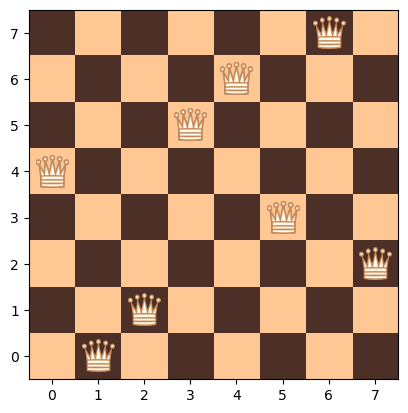

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

class NQueensProblem:
    """This class encapsulates the N-Queens problem
    """

    def __init__(self, numOfQueens):
        """
        :param numOfQueens: the number of queens in the problem
        """
        self.numOfQueens = numOfQueens

    def __len__(self):
        """
        :return: the number of queens
        """
        return self.numOfQueens

    def getViolationsCount(self, positions):
        """
        Calculates the number of violations in the given solution
        Since the input contains unique indices of columns for each row, no row or column violations are possible,
        Only the diagonal violations need to be counted.
        :param positions: a list of indices corresponding to the positions of the queens in each row
        :return: the calculated value
        """

        if len(positions) != self.numOfQueens:
            raise ValueError("size of positions list should be equal to ", self.numOfQueens)

        violations = 0

        # iterate over every pair of queens and find if they are on the same diagonal:
        for i in range(len(positions)):
            for j in range(i + 1, len(positions)):

                # first queen in pair:
                column1 = i
                row1 = positions[i]

                # second queen in pair:
                column2 = j
                row2 = positions[j]

                # look for diagonal threat for th ecurrent pair:
                if abs(column1 - column2) == abs(row1 - row2):
                    violations += 1

        return violations

    def plotBoard(self, positions):
        """
        Plots the positions of the queens on the board according to the given solution
        :param positions: a list of indices corresponding to the positions of the queens in each row.
        """

        if len(positions) != self.numOfQueens:
            raise ValueError("size of positions list should be equal to ", self.numOfQueens)

        fig, ax = plt.subplots()

        # start with the board's squares:
        board = np.zeros((self.numOfQueens, self.numOfQueens))
        # change color of every other square:
        board[::2, 1::2] = 1
        board[1::2, ::2] = 1

        # draw the squares with two different colors:
        ax.imshow(board, interpolation='none', cmap=mpl.colors.ListedColormap(['#ffc794', '#4c2f27']))

        # read the queen image thumbnail and give it a spread of 70% of the square dimensions:
        queenThumbnail = plt.imread('queen-thumbnail.png')
        thumbnailSpread = 0.70 * np.array([-1, 1, -1, 1]) / 2  # spread is [left, right, bottom, top]

        # iterate over the queen positions - i is the row, j is the column:
        for i, j in enumerate(positions):
            # place the thumbnail on the matching square:
            ax.imshow(queenThumbnail, extent=[j, j, i, i] + thumbnailSpread)

        # show the row and column indexes:
        ax.set(xticks=list(range(self.numOfQueens)), yticks=list(range(self.numOfQueens)))

        ax.axis('image')   # scale the plot as square-shaped

        return plt


# create a problem instance:
nQueens = NQueensProblem(8)
# a solution with 3 violations:
solution = [1, 2, 7, 5, 0, 3, 4, 6]

print("Number of violations = ", nQueens.getViolationsCount(solution))

plot = nQueens.plotBoard(solution)
plot.show()

## Solve the NQueens Problem using Genetic Algorithm

As said above,find a way to solve it using the ste base NQueeens Problem.


### Solution


In [2]:
from deap import base
from deap import creator
from deap import tools

import random
import array

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import elitism

# problem constants:
NUM_OF_QUEENS = 16

# Genetic Algorithm constants:
POPULATION_SIZE = 300
MAX_GENERATIONS = 100
HALL_OF_FAME_SIZE = 30
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.1   # probability for mutating an individual

# set the random seed for repeatable results
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

# create the desired N-
nQueens = NQueensProblem(NUM_OF_QUEENS)

toolbox = base.Toolbox()

# define a single objective, minimizing fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
# Why is the default weight -1.0? What does it mean? => This is the way to communicate to DEAP that the fitness is to be minimized. If you want to maximize the fitness, you should use 1.0.

# create the Individual class based on list of integers:
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin)

# create an operator that generates randomly shuffled indices:
toolbox.register("randomOrder", random.sample, range(len(nQueens)), len(nQueens))

# create the individual creation operator to fill up an Individual instance with shuffled indices:
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.randomOrder)

# create the population creation operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


# fitness calculation - compute the total distance of the list of cities represented by indices:
def getViolationsCount(individual):
    return nQueens.getViolationsCount(individual),  # return a tuple


toolbox.register("evaluate", getViolationsCount)


# Genetic operators:
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxUniformPartialyMatched, indpb=2.0/len(nQueens))
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=1.0/len(nQueens))


# create initial population (generation 0):
population = toolbox.populationCreator(n=POPULATION_SIZE)

# prepare the statistics object:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)

# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

# perform the Genetic Algorithm flow with hof feature added:
population, logbook = elitism.eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                            ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)
# Question? hy since the k is n size of the population. Why are we selecting tournament of size selection of n members?
# print hall of fame members info:
print("- Best solutions are:")
for i in range(HALL_OF_FAME_SIZE):
    print(i, ": ", hof.items[i].fitness.values[0], " -> ", hof.items[i])

# plot statistics:
minFitnessValues, meanFitnessValues = logbook.select("min", "avg")
plt.figure(1)
sns.set_style("whitegrid")
plt.plot(minFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Min / Average Fitness')
plt.title('Min and Average fitness over Generations')

# plot best solution:
sns.set_style("whitegrid", {'axes.grid' : False})
nQueens.plotBoard(hof.items[0])

# show both plots:
plt.show()


